# Social Media Analytics Case Project
### Analysis on the tweets data of the Pakistani and Indian Top news channels to have a view on their reaction towards the #Kashmir Issue

Import Libraries

In [144]:
import pandas as pd
import re
import nltk
import sklearn
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import itertools
from textblob import TextBlob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

# import sys
# !{sys.executable} -m pip install textblob

### Read Tweets data 

In [145]:
pakistan_tweets = pd.read_csv("Pakistan Tweets Kashmir English.csv")
indian_tweets = pd.read_csv("Indian Tweets Kashmir English.csv")
pakistan_tweets_bckp = pakistan_tweets
indian_tweets_bckp = indian_tweets

In [146]:
pakistan_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 1 columns):
Pakistan_Tweets    130 non-null object
dtypes: object(1)
memory usage: 1.1+ KB


In [147]:
indian_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 1 columns):
Indian_Tweets    256 non-null object
dtypes: object(1)
memory usage: 2.1+ KB


### Helping Functions defined here

In [148]:
stop_words = list(stopwords.words("English"))
tweet_tokenizer = TweetTokenizer()
stemmer = nltk.stem.PorterStemmer()
lemmatizer = WordNetLemmatizer()

def lower_word(x):
     return [words.lower() for words in x]
    
def remove_user(x):
    return [re.sub(r'@(?i)[a-z0-9_]+',"", words) for words in x]

def remove_hash(x):
    return [re.sub(r'#(?i)[a-z0-9_]+',"", words) for words in x]

def remove_link(x):
    return [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", words) for words in x]

def stem(x):
    return [ stemmer.stem(words) for words in x]

def lemma(x):
     return [ lemmatizer.lemmatize(words) for words in x]

def stop_word(x):
     return [words for words in x if not words in stop_words]

def punctuations(x):
     return [words for words in x if words.isalpha()]
    
def remove_url(tweet):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

def keep_user(x):
    return [re.findall(r'@(?i)[a-z0-9_]+', words) for words in x]


def keep_hash(x):
    return [re.findall(r'#(?i)[a-z0-9_]+', words) for words in x]


def tweet_preprocessor_hash(text):
    tweet_tokenizer = TweetTokenizer()
    stemmer = nltk.stem.PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = list(stopwords.words("English"))

    clean_text = tweet_tokenizer.tokenize(text)
    clean_text = lower_word(clean_text)
    clean_text = keep_hash(clean_text)
    clean_text = list(itertools.chain.from_iterable(clean_text))
    clean_text = ', '.join(words for words in clean_text)
    
    return clean_text

def tweet_preprocessor(text):
    tweet_tokenizer = TweetTokenizer()
    stemmer = nltk.stem.PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = list(stopwords.words("English"))

    clean_text = tweet_tokenizer.tokenize(text)
    clean_text = lower_word(clean_text)
    clean_text = remove_user(clean_text)
    clean_text = remove_hash(clean_text)
    clean_text = remove_link(clean_text)
    clean_text = stem(clean_text)
    clean_text = lemma(clean_text)
    clean_text = stop_word(clean_text)
    clean_text = punctuations(clean_text)
    
    clean_text = ', '.join(words for words in clean_text)
    
    return clean_text

def tweet_preprocessor_users(text):
    tweet_tokenizer = TweetTokenizer()
    stemmer = nltk.stem.PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = list(stopwords.words("English"))

    clean_text = tweet_tokenizer.tokenize(text)
    clean_text = lower_word(clean_text)
    clean_text = keep_user(clean_text)
    clean_text = list(itertools.chain.from_iterable(clean_text))
    clean_text = ', '.join(words for words in clean_text)
    
    return clean_text

## Sentiment Analysis

### Pakistan

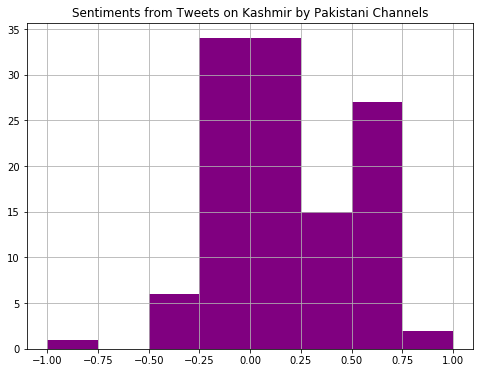

In [149]:
pak_tweets_text = pakistan_tweets['Pakistan_Tweets']
pak_tweets = [remove_url(tweet) for tweet in pak_tweets_text]
sentiment_objects = [TextBlob(tweet) for tweet in pak_tweets]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
fig, ax = plt.subplots(figsize=(8, 6))
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Kashmir by Pakistani Channels")
plt.show()

### India

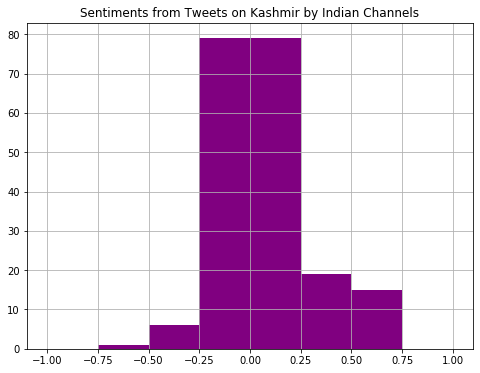

In [150]:
indian_tweets_text = indian_tweets['Indian_Tweets']
ind_tweets = [remove_url(tweet) for tweet in indian_tweets_text]
sentiment_objects = [TextBlob(tweet) for tweet in ind_tweets]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
fig, ax = plt.subplots(figsize=(8, 6))
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Kashmir by Indian Channels")
plt.show()

### Word Count of Pakistani Tweets

In [151]:
pakistan_tweets['Clean_data'] = pakistan_tweets['Pakistan_Tweets'].apply(lambda x : tweet_preprocessor(x))
pakistan_tweets['Clean_data'].head(20)

0     world, snooker, champion, muhammad, asif, dedi...
1     world, must, stop, equat, strateg, relat, urg,...
2     whole, nation, stand, firmli, unit, issu, sira...
3     whole, nation, stand, firm, unit, issu, siraju...
4                keep, fight, till, last, breath, bilaw
5     video, leader, escort, secur, heckl, qasim, su...
6     video, tear, apart, tall, claim, modi, bjp, oc...
7     u, senat, concern, blackout, restrict, indian,...
8     u, democrat, senat, former, governor, virginia...
9     u, congresswoman, activist, new, york, alexand...
10                   un, chief, urg, talk, resolv, issu
11    two, trucker, kill, occupi, appl, trade, turn,...
12                    two, youth, martyr, troop, occupi
13    thousand, take, street, protest, indian, bruta...
14    world, largest, kashmir, flag, measur, meter, ...
15    plight, innoc, peopl, indian, occupi, onc, mak...
16    peopl, observ, tomorrow, octob, solidar, innoc...
17    peopl, observ, octob, solidar, innoc, peop

In [152]:
pakistan_tweets['Word_Count'] = pakistan_tweets['Clean_data'].apply(lambda x : len(x))

In [153]:
pakistan_tweets.head(20)

,Pakistan_Tweets,Clean_data,Word_Count
0,World Snooker champion Muhammad Asif dedicates...,"world, snooker, champion, muhammad, asif, dedi...",73
1,World must stop equating #Kashmir with strateg...,"world, must, stop, equat, strateg, relat, urg,...",57
2,Whole nation stands firmly united on #Kashmir ...,"whole, nation, stand, firmli, unit, issu, sira...",54
3,Whole nation stands firm united on #Kashmir is...,"whole, nation, stand, firm, unit, issu, siraju...",52
4,We will keep fighting for #Kashmir till last b...,"keep, fight, till, last, breath, bilaw",38
5,VIDEO: #BJP leader escorted out by security fo...,"video, leader, escort, secur, heckl, qasim, su...",70
6,Video tears apart tall claims of Modi’s BJP in...,"video, tear, apart, tall, claim, modi, bjp, oc...",56
7,US Senator #ElizabethWarren concerned about bl...,"u, senat, concern, blackout, restrict, indian,...",59
8,US Democratic Senator &amp; former Governor of...,"u, democrat, senat, former, governor, virginia...",139
9,"US Congresswoman &amp; activist from New York,...","u, congresswoman, activist, new, york, alexand...",136


In [154]:
pakistan_tweets = pakistan_tweets[pakistan_tweets['Word_Count'] > 0]
pakistan_tweets.head(20)

,Pakistan_Tweets,Clean_data,Word_Count
0,World Snooker champion Muhammad Asif dedicates...,"world, snooker, champion, muhammad, asif, dedi...",73
1,World must stop equating #Kashmir with strateg...,"world, must, stop, equat, strateg, relat, urg,...",57
2,Whole nation stands firmly united on #Kashmir ...,"whole, nation, stand, firmli, unit, issu, sira...",54
3,Whole nation stands firm united on #Kashmir is...,"whole, nation, stand, firm, unit, issu, siraju...",52
4,We will keep fighting for #Kashmir till last b...,"keep, fight, till, last, breath, bilaw",38
5,VIDEO: #BJP leader escorted out by security fo...,"video, leader, escort, secur, heckl, qasim, su...",70
6,Video tears apart tall claims of Modi’s BJP in...,"video, tear, apart, tall, claim, modi, bjp, oc...",56
7,US Senator #ElizabethWarren concerned about bl...,"u, senat, concern, blackout, restrict, indian,...",59
8,US Democratic Senator &amp; former Governor of...,"u, democrat, senat, former, governor, virginia...",139
9,"US Congresswoman &amp; activist from New York,...","u, congresswoman, activist, new, york, alexand...",136


### User Count of Pakistani Tweets

In [155]:
vectorizer = CountVectorizer(preprocessor = tweet_preprocessor)
X = vectorizer.fit_transform(pakistan_tweets['Pakistan_Tweets'])
occ = np.asarray(X.sum(axis = 0)).ravel().tolist()
fre_count = pd.DataFrame({'terms':vectorizer.get_feature_names(), 'Freq':occ})
fre_count.sort_values('Freq',ascending = False).head(20)

,terms,Freq
316,occupi,65
371,read,41
253,kashmir,29
226,indian,27
116,day,24
105,continu,20
338,peopl,16
343,pm,13
294,militari,12
483,today,12


In [156]:
pakistan_tweets = pakistan_tweets_bckp
pakistan_tweets['Clean_data'] = pakistan_tweets['Pakistan_Tweets'].apply(lambda x : tweet_preprocessor_users(x))
pakistan_tweets['Clean_data'].head(20)

0             
1             
2             
3             
4             
5             
6             
7             
8             
9             
10            
11            
12            
13            
14            
15    @nytimes
16            
17            
18            
19            
Name: Clean_data, dtype: object

In [157]:
pakistan_tweets['Count'] = pakistan_tweets['Clean_data'].apply(lambda x : len(x))
pakistan_tweets = pakistan_tweets[pakistan_tweets['Count'] > 0]
pakistan_tweets.head(20)

,Pakistan_Tweets,Clean_data,Word_Count,Count
15,The plight of the innocent people of Indian Oc...,@nytimes,93,8
23,"The cover of the @nytimes on October 1st, 2019...",@nytimes,80,8
24,RT @USCIRF: “Cell and Internet service denied ...,"@uscirf, @commrbhargava",77,23
25,RT @USCIRF: ⁦@RepMcGovern⁩ calls on India to a...,"@uscirf, @repmcgovern",61,21
26,"RT @UNGeneva: ""We urge the Indian authorities ...","@ungeneva, @unhumanrights",144,25
27,"RT @UNGeneva: ""We are extremely concerned that...","@ungeneva, @unhumanrights",143,25
28,"RT @UNGeneva: ""Major political decisions about...","@ungeneva, @unhumanrights",166,25
29,RT @Ruptly: Hundreds march in #Frankfurt to pr...,@ruptly,35,7
30,RT @DunyaBlogs: #KartarpurCorridor is an openi...,@dunyablogs,137,11
83,Catch Turkish Ambassador to Pakistan HE @Musta...,"@mustafa_mfa, @barribaat, @realdonaldtrump, @i...",67,75


In [158]:
vectorizer = CountVectorizer(preprocessor = tweet_preprocessor_users)
X = vectorizer.fit_transform(pakistan_tweets['Pakistan_Tweets'])
occ = np.asarray(X.sum(axis = 0)).ravel().tolist()
fre_count = pd.DataFrame({'terms':vectorizer.get_feature_names(), 'Freq':occ})
fre_count.sort_values('Freq',ascending = False).head(20)

,terms,Freq
10,ungeneva,3
11,unhumanrights,3
4,imrankhanpti,2
6,nytimes,2
12,uscirf,2
0,barribaat,1
1,commrbhargava,1
2,dunyablogs,1
3,humnewspakistan,1
5,mustafa_mfa,1


### HashTag Count of Pakistani Tweets

In [159]:
pakistan_tweets = pakistan_tweets_bckp
pakistan_tweets['Clean_data'] = pakistan_tweets['Pakistan_Tweets'].apply(lambda x : tweet_preprocessor_hash(x))
pakistan_tweets['Clean_data'].head(20)

0     #dunyavideos, #snooker, #muhammadasif, #kashmir
1                     #kashmir, #washington, #geonews
2                                  #kashmir, #arynews
3                                  #kashmir, #arynews
4                                  #kashmir, #arynews
5                                      #bjp, #kashmir
6                                  #kashmir, #geonews
7                #elizabethwarren, #kashmir, #geonews
8                            #kashmir, #kashmirbleeds
9                            #kashmir, #kashmirbleeds
10                                 #kashmir, #arynews
11                        #indian, #kashmir, #geonews
12                        #indian, #kashmir, #arynews
13                        #geneva, #kashmir, #geonews
14                                 #arynews, #kashmir
15                           #kashmir, #kashmirbleeds
16     #pakistan, #blackday, #kashmir, #kashmirbleeds
17     #pakistan, #blackday, #kashmir, #kashmirbleeds
18     #pakistan, #blackday,

In [160]:
pakistan_tweets['Count'] = pakistan_tweets['Clean_data'].apply(lambda x : len(x))
pakistan_tweets = pakistan_tweets[pakistan_tweets['Count'] > 0]
pakistan_tweets.head(20)

,Pakistan_Tweets,Clean_data,Word_Count,Count
0,World Snooker champion Muhammad Asif dedicates...,"#dunyavideos, #snooker, #muhammadasif, #kashmir",73,47
1,World must stop equating #Kashmir with strateg...,"#kashmir, #washington, #geonews",57,31
2,Whole nation stands firmly united on #Kashmir ...,"#kashmir, #arynews",54,18
3,Whole nation stands firm united on #Kashmir is...,"#kashmir, #arynews",52,18
4,We will keep fighting for #Kashmir till last b...,"#kashmir, #arynews",38,18
5,VIDEO: #BJP leader escorted out by security fo...,"#bjp, #kashmir",70,14
6,Video tears apart tall claims of Modi’s BJP in...,"#kashmir, #geonews",56,18
7,US Senator #ElizabethWarren concerned about bl...,"#elizabethwarren, #kashmir, #geonews",59,36
8,US Democratic Senator &amp; former Governor of...,"#kashmir, #kashmirbleeds",139,24
9,"US Congresswoman &amp; activist from New York,...","#kashmir, #kashmirbleeds",136,24


In [161]:
vectorizer = CountVectorizer(preprocessor = tweet_preprocessor_hash)
X = vectorizer.fit_transform(pakistan_tweets['Pakistan_Tweets'])
occ = np.asarray(X.sum(axis = 0)).ravel().tolist()
fre_count = pd.DataFrame({'terms':vectorizer.get_feature_names(), 'Freq':occ})
fre_count.sort_values('Freq',ascending = False).head(20)

,terms,Freq
34,kashmir,130
2,arynews,54
23,geonews,40
26,india,17
35,kashmirbleeds,8
27,indian,7
47,pakistan,7
28,iok,6
64,us,5
48,pmimran,4


# For INDIA now

### Word Count of Indian Tweets

In [162]:
indian_tweets['Clean_data'] = indian_tweets['Indian_Tweets'].apply(lambda x : tweet_preprocessor(x))
indian_tweets['Clean_data'].head(20)

0     want, tell, peopl, maharashtra, care, right, s...
1                              time, due, refer, matter
2     opposit, allow, european, nicolau, fest, also,...
3     bjp, spokesperson, explain, whi, govt, take, t...
4     realli, normal, watch, panellist, debat, thi, ...
5                                  realli, normal, live
6           thi, look, like, day, lockdown, watch, live
7     school, open, attend, neglig, watch, thi, grou...
8     appl, trade, hit, clampdown, take, look, thi, ...
9      pm, extend, greet, nation, like, celebr, soldier
10    deleg, visit, mp, reach, srinagar, review, sit...
11           mp, say, intern, issu, stand, india, fight
12    deleg, visit, tomorrow, want, see, ground, act...
13    foreign, minist, speak, interview, wion, hi, t...
14    turkish, ambassador, sakir, ozkan, torunlar, s...
15    union, home, minist, shri, interview, break, h...
16    scienc, technolog, minist, want, provid, inter...
17    attempt, creat, alarm, issu, debat, one, a

In [163]:
indian_tweets['Count'] = indian_tweets['Clean_data'].apply(lambda x : len(x))
indian_tweets = indian_tweets[indian_tweets['Count'] > 0]
indian_tweets.head(20)

,Indian_Tweets,Clean_data,Count
0,"""I want to tell them that the people of Mahara...","want, tell, peopl, maharashtra, care, right, s...",93
1,"""No Time"" Due To #AyodhyaHearing, #SupremeCour...","time, due, refer, matter",24
2,"""Opposition should be allowed in #Kashmir"" Eur...","opposit, allow, european, nicolau, fest, also,...",75
3,#Art370Scrapped | BJP spokesperson @GVLNRAO ex...,"bjp, spokesperson, explain, whi, govt, take, t...",89
4,#Art370Scrapped | Is #Kashmir really normal ? ...,"realli, normal, watch, panellist, debat, thi, ...",57
5,#Art370Scrapped | Is #Kashmir really normal? \...,"realli, normal, live",20
6,#Article370Scrapped \nThis is what #Kashmir lo...,"thi, look, like, day, lockdown, watch, live",43
7,"#Article370Scrapped | #Kashmir: Schools open, ...","school, open, attend, neglig, watch, thi, grou...",62
8,#Article370Scrapped | #Kashmir's apple trade h...,"appl, trade, hit, clampdown, take, look, thi, ...",73
9,#Diwali : PM #Modi Extends Greetings To Nation...,"pm, extend, greet, nation, like, celebr, soldier",48


In [164]:
vectorizer = CountVectorizer(preprocessor = tweet_preprocessor)
X = vectorizer.fit_transform(indian_tweets['Indian_Tweets'])
occ = np.asarray(X.sum(axis = 0)).ravel().tolist()
fre_count = pd.DataFrame({'terms':vectorizer.get_feature_names(), 'Freq':occ})
fre_count.sort_values('Freq',ascending = False).head(20)

,terms,Freq
1002,watch,57
989,visit,48
450,kashmir,45
435,issu,34
415,india,34
493,live,31
733,report,26
975,valley,26
981,video,26
917,thi,24


### User Count of Indian Tweets

In [165]:
indian_tweets = indian_tweets_bckp
indian_tweets['Clean_data'] = indian_tweets['Indian_Tweets'].apply(lambda x : tweet_preprocessor_users(x))
indian_tweets['Clean_data'].head(20)

0                                                 
1                                                 
2                                                 
3                         @gvlnrao, @gauravcsawant
4                                 @sardesairajdeep
5                                                 
6          @ashraf_wani, @shujauh, @preetichoudhry
7                                         @shujauh
8                                     @ashraf_wani
9                                                 
10                                                
11                                                
12                                                
13    @haavisto, @wionews, @haavisto, @rrrameshrrr
14                        @palkisu, @turkeyindelhi
15           @amitshah, @wionews, @sudhirchaudhary
16                                        @palkisu
17                              @ilhanmn, @palkisu
18                                                
19                        @palk

In [166]:
indian_tweets['Count'] = indian_tweets['Clean_data'].apply(lambda x : len(x))
indian_tweets = indian_tweets[indian_tweets['Count'] > 0]
indian_tweets.head(20)

,Indian_Tweets,Clean_data,Count
3,#Art370Scrapped | BJP spokesperson @GVLNRAO ex...,"@gvlnrao, @gauravcsawant",24
4,#Art370Scrapped | Is #Kashmir really normal ? ...,@sardesairajdeep,16
6,#Article370Scrapped \nThis is what #Kashmir lo...,"@ashraf_wani, @shujauh, @preetichoudhry",39
7,"#Article370Scrapped | #Kashmir: Schools open, ...",@shujauh,8
8,#Article370Scrapped | #Kashmir's apple trade h...,@ashraf_wani,12
13,#Exclusive | #Finland's Foreign Minister @Haav...,"@haavisto, @wionews, @haavisto, @rrrameshrrr",44
14,"#Exclusive | Turkish Ambassador to #India, Sak...","@palkisu, @turkeyindelhi",24
15,"#Exclusive | Union Home Minister of #India, Sh...","@amitshah, @wionews, @sudhirchaudhary",37
16,#Gravitas | #Pakistan's science &amp; technolo...,@palkisu,8
17,#Gravitas | @IlhanMN attempts to create alarms...,"@ilhanmn, @palkisu",18


In [167]:
vectorizer = CountVectorizer(preprocessor = tweet_preprocessor_users)
X = vectorizer.fit_transform(indian_tweets['Indian_Tweets'])
occ = np.asarray(X.sum(axis = 0)).ravel().tolist()
fre_count = pd.DataFrame({'terms':vectorizer.get_feature_names(), 'Freq':occ})
fre_count.sort_values('Freq',ascending = False).head(20)

,terms,Freq
41,palkisu,25
57,shujauh,15
18,gauravcsawant,12
8,ashraf_wani,10
27,indiatvnews,9
46,rahulkanwal,9
47,rajatsharmalive,9
33,mirfareed2,8
69,wionews,7
7,ankit_tyagi01,6


### HashTag Count of Indian Tweets

In [168]:
indian_tweets = indian_tweets_bckp
indian_tweets['Clean_data'] = indian_tweets['Indian_Tweets'].apply(lambda x : tweet_preprocessor_hash(x))
indian_tweets['Clean_data'].head(20)

0                                              #kashmir
1              #ayodhyahearing, #supremecourt, #kashmir
2                                              #kashmir
3                #art370scrapped, #kashmir, #indiafirst
4                 #art370scrapped, #kashmir, #newstoday
5                 #art370scrapped, #kashmir, #newstoday
6               #article370scrapped, #kashmir, #indepth
7               #article370scrapped, #kashmir, #indepth
8               #article370scrapped, #kashmir, #indepth
9                              #diwali, #modi, #kashmir
10                                        #eu, #kashmir
11                  #eu, #kashmir, #article370, #terror
12                             #europeanunion, #kashmir
13    #exclusive, #finland, #indian, #newdelhi, #fin...
14     #exclusive, #india, #turkey, #kashmir, #gravitas
15            #exclusive, #india, #article370, #kashmir
16                       #gravitas, #pakistan, #kashmir
17                    #gravitas, #india, #kashmi

In [169]:
indian_tweets['Count'] = indian_tweets['Clean_data'].apply(lambda x : len(x))
indian_tweets = indian_tweets[indian_tweets['Count'] > 0]
indian_tweets.head(20)

,Indian_Tweets,Clean_data,Count
0,"""I want to tell them that the people of Mahara...",#kashmir,8
1,"""No Time"" Due To #AyodhyaHearing, #SupremeCour...","#ayodhyahearing, #supremecourt, #kashmir",40
2,"""Opposition should be allowed in #Kashmir"" Eur...",#kashmir,8
3,#Art370Scrapped | BJP spokesperson @GVLNRAO ex...,"#art370scrapped, #kashmir, #indiafirst",38
4,#Art370Scrapped | Is #Kashmir really normal ? ...,"#art370scrapped, #kashmir, #newstoday",37
5,#Art370Scrapped | Is #Kashmir really normal? \...,"#art370scrapped, #kashmir, #newstoday",37
6,#Article370Scrapped \nThis is what #Kashmir lo...,"#article370scrapped, #kashmir, #indepth",39
7,"#Article370Scrapped | #Kashmir: Schools open, ...","#article370scrapped, #kashmir, #indepth",39
8,#Article370Scrapped | #Kashmir's apple trade h...,"#article370scrapped, #kashmir, #indepth",39
9,#Diwali : PM #Modi Extends Greetings To Nation...,"#diwali, #modi, #kashmir",24


In [170]:
vectorizer = CountVectorizer(preprocessor = tweet_preprocessor_hash)
X = vectorizer.fit_transform(indian_tweets['Indian_Tweets'])
occ = np.asarray(X.sum(axis = 0)).ravel().tolist()
fre_count = pd.DataFrame({'terms':vectorizer.get_feature_names(), 'Freq':occ})
fre_count.sort_values('Freq',ascending = False).head(20)

,terms,Freq
64,kashmir,256
43,india,24
97,pakistan,24
56,itvideo,21
10,article370,17
37,gravitas,15
59,jammuandkashmir,14
2,aajkibaat,9
93,newstrack,9
44,indiafirst,8


# END